## 讀入CSV 檔

### 方法一

In [3]:
import pandas
orders = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/purchase_order.tab', sep = '\t', header=None)

In [7]:
orders.columns = ['Time','Action','User','Product','Quantity','Price']
orders.head()

,Time,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0


In [10]:
orders['Time'] = pandas.to_datetime(orders['Time'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54772 entries, 0 to 54771
Data columns (total 6 columns):
Time        54772 non-null datetime64[ns]
Action      54772 non-null object
User        54772 non-null object
Product     54772 non-null object
Quantity    54772 non-null int64
Price       54721 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.5+ MB


### 方法二

In [13]:
import pandas
orders_url = 'https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/purchase_order.tab'
m_cols = ['Time','Action','User','Product','Quantity','Price']
orders = pandas.read_csv(orders_url, sep = '\t', 
                         header=None, names = m_cols,
                         parse_dates={'Dates':[0]}, 
                         encoding = 'utf-8', 
                         dtype = {'Price':'object'})

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54772 entries, 0 to 54771
Data columns (total 6 columns):
Dates       54772 non-null datetime64[ns]
Action      54772 non-null object
User        54772 non-null object
Product     54772 non-null object
Quantity    54772 non-null int64
Price       54721 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.5+ MB


In [15]:
?pandas.read_csv

## 讀入Excel 檔

In [18]:
import pandas
salary = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/salary2.xls')
salary.head()

WARNING *** file size (2662336) not 512 + multiple of sector size (512)


,時間(月),行業,受僱員工人數,每人每月薪資,經常性 薪資,非經常性薪資,加班費,平均 工時,正常 工時,加班 工時
NaN,97/1,工業及服務業,6621763,65740,36804,28936,1502,188.0,178.9,9.1
NaN,97/1,工業部門,3056248,65834,35249,30585,2512,193.5,177.9,15.6
NaN,97/1,服務業部門,3565515,65660,38138,27522,636,183.4,179.8,3.6
NaN,97/1,礦業及土石採取業,4817,75724,39973,35751,1062,190.6,185.6,5.0
NaN,97/1,製造業,2568373,67400,34621,32779,2774,195.2,177.7,17.5


In [19]:
salary['每人每月薪資'].max()

415055

In [27]:
salary.columns

Index(['時間(月)', '行業', '受僱員工人數', '每人每月薪資', '經常性\n薪資', '非經常性薪資', '加班費', '平均\n工時',
       '正常\n工時', '加班\n工時'],
      dtype='object')

In [28]:
salary.sort_values('經常性\n薪資', ascending=False).head(3)

,時間(月),行業,受僱員工人數,每人每月薪資,經常性 薪資,非經常性薪資,加班費,平均 工時,正常 工時,加班 工時
NaN,106/2,其他保險及退休基金輔助業,465,84937,84059,878,878,146.9,144.0,2.9
NaN,106/1,其他保險及退休基金輔助業,463,187783,84023,103760,1146,147.9,143.8,4.1
NaN,106/3,其他保險及退休基金輔助業,465,84644,83994,650,650,188.6,186.5,2.1


In [32]:
salary.groupby('行業')['經常性\n薪資'].mean().sort_values(ascending=False).head(3)

行業
其他保險及退休基金輔助業    77506.517241
電力供應業           69555.060345
海洋水運業           67587.112069
Name: 經常性\n薪資, dtype: float64

In [46]:
banking = salary[salary['行業'] == '銀行業'][['時間(月)','經常性\n薪資']]

In [47]:
banking.index = banking['時間(月)']

Populating the interactive namespace from numpy and matplotlib


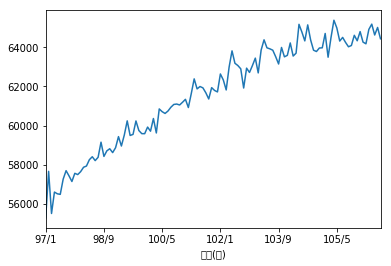

In [48]:
%pylab inline
banking['經常性\n薪資'].plot(kind = 'line')

## 檔案輸出

In [49]:
orders.to_csv('orders.csv')

In [53]:
banking.to_csv('banking.csv')

In [50]:
orders.to_csv('orders.tsv', sep = '\t')

In [54]:
orders.to_csv('orders.tsv', sep = '\t', chunksize=1000)

In [52]:
orders.to_excel('orders.xlsx')

In [56]:
orders.head().to_json()

'{"Dates":{"0":1435708801000,"1":1435708803000,"2":1435708819000,"3":1435708870000,"4":1435708896000},"Action":{"0":"order","1":"order","2":"order","3":"order","4":"order"},"User":{"0":"U312622727","1":"U239012343","2":"U10007697373","3":"U296328517","4":"U300884570"},"Product":{"0":"P0006944501","1":"P0006018073","2":"P0002267974","3":"P0016144236","4":"P0014516980122"},"Quantity":{"0":1,"1":1,"2":1,"3":1,"4":1},"Price":{"0":"1069","1":"1680","2":"285","3":"550","4":"249"}}'

In [57]:
orders.head().T.to_json()

'{"0":{"Dates":1435708801000,"Action":"order","User":"U312622727","Product":"P0006944501","Quantity":1,"Price":"1069"},"1":{"Dates":1435708803000,"Action":"order","User":"U239012343","Product":"P0006018073","Quantity":1,"Price":"1680"},"2":{"Dates":1435708819000,"Action":"order","User":"U10007697373","Product":"P0002267974","Quantity":1,"Price":"285"},"3":{"Dates":1435708870000,"Action":"order","User":"U296328517","Product":"P0016144236","Quantity":1,"Price":"550"},"4":{"Dates":1435708896000,"Action":"order","User":"U300884570","Product":"P0014516980122","Quantity":1,"Price":"249"}}'

In [59]:
orders.head().to_clipboard()

In [60]:
df1 = pandas.read_clipboard()
df1

,,Dates,Action,User,Product,Quantity,Price
0,2015-07-01,00:00:01,order,U312622727,P0006944501,1,1069
1,2015-07-01,00:00:03,order,U239012343,P0006018073,1,1680


In [70]:
product_list = pandas.read_clipboard(header=None)
product_items = product_list[0].tolist()

In [71]:
product_items

['P0012662252',
 'P0004401294',
 'P0000319874',
 'P0006944501',
 'P0003248055',
 'P0018924850',
 'P0013850723']

In [73]:
orders[orders['Product'].isin(product_items)].head()

,Dates,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069
6,2015-07-01 00:01:58,order,U465124055,P0012662252,1,488
7,2015-07-01 00:02:18,order,U403001364,P0004401294,1,276
8,2015-07-01 00:03:12,order,U465123247,P0000319874,1,2199
9,2015-07-01 00:03:45,order,U311808547,P0006944501,1,1069


## 讀取HTML


In [83]:
import requests
headers = {
    'user-agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
}
res = requests.get('https://goodinfo.tw/StockInfo/StockBzPerformance.asp?STOCK_ID=2330',verify=False, headers = headers)

C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [85]:
res.encoding='utf-8'
dfs = pandas.read_html(res.text)

In [86]:
type(dfs)

list

In [87]:
len(dfs)

18

In [98]:
dfs[16].head(3)

,年度,股本(億),財報評分,年度股價(元),獲利金額(億),獲利率(%),ROE(%),ROA(%),EPS(元),BPS(元),...,Unnamed: 11_level_0,Unnamed: 12_level_0,Unnamed: 13_level_0,Unnamed: 14_level_0,Unnamed: 15_level_0,Unnamed: 16_level_0,Unnamed: 17_level_0,Unnamed: 18_level_0,Unnamed: 19_level_0,Unnamed: 20_level_0
,收盤,平均,漲跌,漲跌(%),營業收入,營業毛利,營業利益,業外損益,稅後淨利,營業毛利,...,業外損益,稅後淨利,稅後EPS,成長(元),Unnamed: 15_level_1,Unnamed: 16_level_1,Unnamed: 17_level_1,Unnamed: 18_level_1,Unnamed: 19_level_1,Unnamed: 20_level_1
0,17Q2,2593,94,239.0,206.0,57.5,31.7,4478,2302,1786,...,1539,51.4,39.9,1.19,34.4,22.5(年估),15.9(年估),5.94,0.65,51.74
1,2016,2593,91,181.5,166.0,38.5,26.9,9479,4748,3780,...,3342,50.1,39.9,0.84,35.3,25.6,18.9,12.89,1.07,53.58
2,2015,2593,94,143.0,140.0,2.0,1.4,8435,4104,3200,...,3066,48.7,37.9,3.60,36.3,27,19.4,11.82,1.64,47.11


In [99]:
tw2330 = dfs[16]

In [100]:
tw2330.to_html('tw2330.html')